In [1]:
import numpy as np

In [5]:
x_seeds = np.array([(0,0), (1,0), (0,1), (1,1)], dtype=np.float)
y_seeds = np.array([0,1,1,0])

C:\Users\minkyeong\AppData\Local\Temp\ipykernel_18276\2735544862.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_seeds = np.array([(0,0), (1,0), (0,1), (1,1)], dtype=np.float)


In [6]:
N = 1000
idxs = np.random.randint(0,4,N)

In [7]:
X = x_seeds[idxs]
Y = y_seeds[idxs]

In [8]:
X += np.random.normal(scale = 0.25, size=X.shape)

In [14]:
class shallow_neural_network():
    def __init__(self, num_input_features, num_hiddens):
        self.num_input_features = num_input_features
        self.num_hiddens = num_hiddens
        
        self.W1 = np.random.normal(size = (num_hiddens, num_input_features))
        self.b1 = np.random.normal(size = num_hiddens)
        self.W2 = np.random.normal(size = num_hiddens)
        self.b2 = np.random.normal(size = 1)
        
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))

    def predict(self, x):
        z1 = np.matmul(self.W1, x) + self.b1
        a1 = np.tanh(z1)
        z2 = np.matmul(self.W2, a1) + self.b2
        a2 = self.sigmoid(z2)
        return a2, (z1, a1, z2, a2)

In [15]:
model = shallow_neural_network(2,3)

In [18]:
def train(X, Y, model, lr = 0.1):
    dW1 = np.zeros_like(model.W1)
    db1 = np.zeros_like(model.b1)
    dW2 = np.zeros_like(model.W2)
    db2 = np.zeros_like(model.b2)
    m = len(X)
    cost = 0.0
    
    for x,y in zip(X,Y):
        a2, (z1,a1,z2,_) = model.predict(x)
        if y == 1:
            cost -= np.log(a2)
        else:
            cost -= np.log(1-a2)
        
        diff = a2-y
        db2 += diff
        
        
        """ 1st for loop
        for i in range(model.num_hiddens):
            dW2[i] += a1[i]*diff
        """
        dW2 += a1*diff

        """ 2nd for loop
        for i in range(model.num_hiddens):
            db1[i] += (1-a1[i]**2)*model.W2[i]*diff
        """
        db1 += (1-a1**2)*model.W2*diff
        
        """ 3rd, 4th for loop
        for i in range(model.num_hiddens):
            for j in range(model.num_input_features):
                dW1[i,j] += x[j]*(1-a1[i]**2)*model.W2[i]*diff
        """
        dW1 += np.outer((1-a1**2)*model.W2*diff, x)
        
                
    cost /= m
    model.W1 -= lr * dW1/m
    model.b1 -= lr * db1/m
    model.W2 -= lr * dW2/m
    model.b2 -= lr * db2/m
    
    return cost

In [19]:
for epoch in range(100):
    cost = train(X,Y,model,1.0)
    if epoch % 10 == 0:
        print(epoch, cost)

0 [0.82030559]
10 [0.62158141]
20 [0.56463481]
30 [0.51841846]
40 [0.44265643]
50 [0.34813584]
60 [0.28575342]
70 [0.24795352]
80 [0.22419175]
90 [0.208429]


In [21]:
model.predict((1,1))[0].item()

0.0998718198243752

In [22]:
model.predict((1,0))[0].item()

0.9254796301336976

In [23]:
model.predict((0,1))[0].item()

0.9492071258223832

In [24]:
model.predict((0,0))[0].item()

0.021002025044839688

In [25]:
import matplotlib.pyplot as plt

In [26]:
idxs_1 = np.where(Y==1)
idxs_0 = np.where(Y==0)

In [27]:
X_0 = X[idxs_0]
Y_0 = Y[idxs_0]

In [30]:
X_1 = X[idxs_1]
Y_1 = Y[idxs_1]

<function matplotlib.pyplot.show(close=None, block=None)>

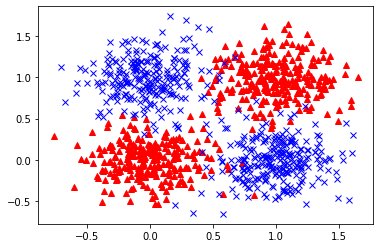

In [31]:
plt.plot(X_0[:,0], X_0[:,1], "r^")
plt.plot(X_1[:,0], X_1[:,1], "bx")
plt.show